In [1]:
from sklearn.datasets import fetch_california_housing


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

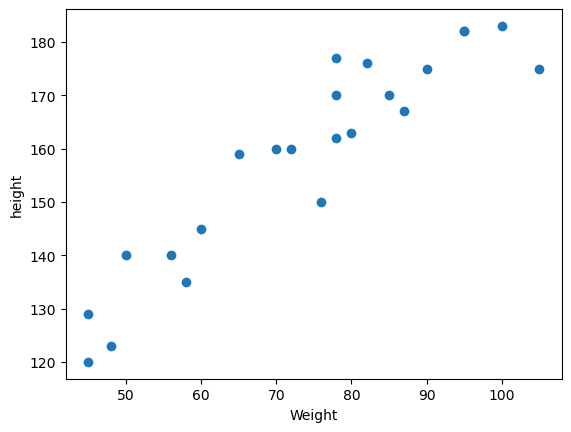

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")

In [6]:
X=df[['Weight']]
Y=df['Height']

In [7]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [8]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [11]:
X.shape

(23, 1)

In [12]:
X_train.shape

(18, 1)

In [13]:
X_test.shape,y_train.shape,y_test.shape


((5, 1), (18,), (5,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

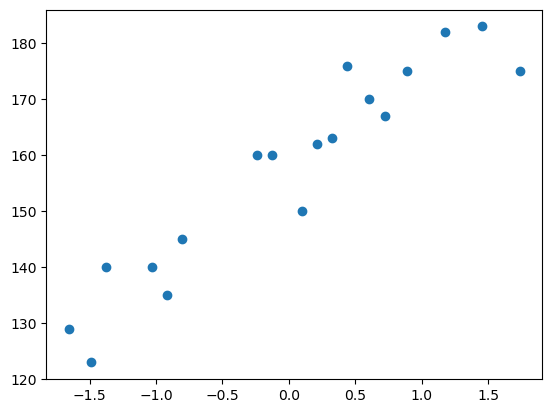

In [18]:
plt.scatter(X_train,y_train)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


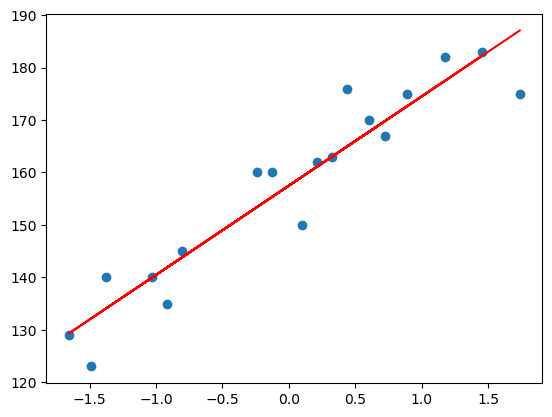

In [23]:
plt.scatter(X_train,y_train)
plt.plot( X_train,regressor.predict(X_train),'r')


In [24]:
y_pred_test=regressor.predict(X_test)    

In [25]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

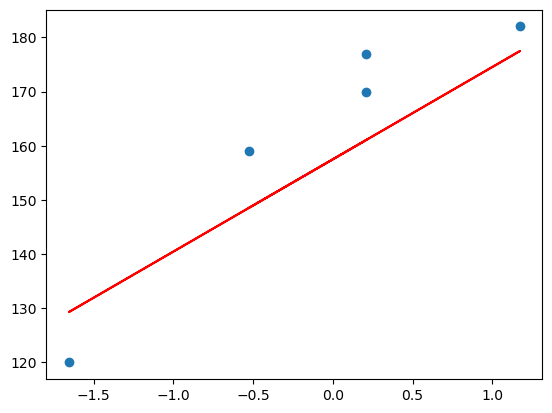

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [30]:
score

0.7769869860423441

In [31]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [32]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\saira\anaconda3\envs\MLLearning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [33]:
scaled_weight[0]

array([0.32350772])

In [34]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


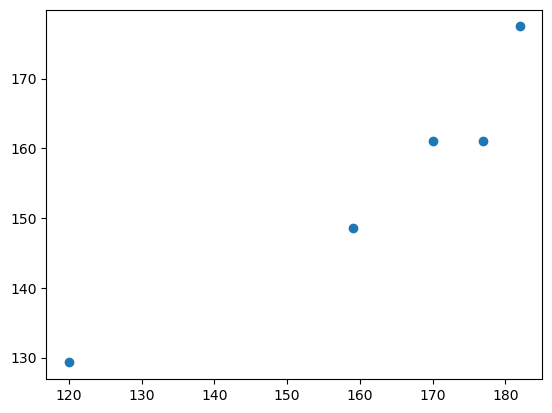

In [35]:
plt.scatter(y_test,y_pred_test)

In [36]:
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

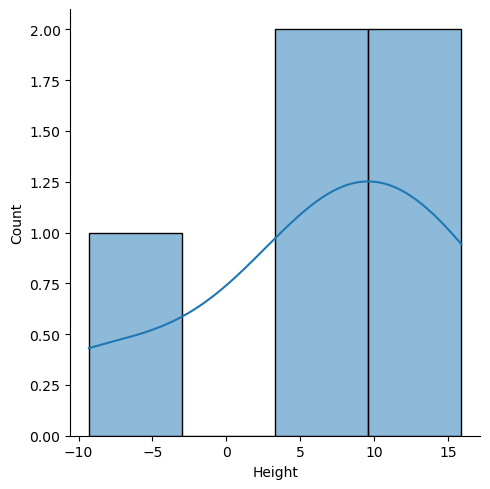

In [37]:
## plot this residuals
import seaborn as sns
sns.displot(residuals,kde=True,)

In [38]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [39]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [40]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [41]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

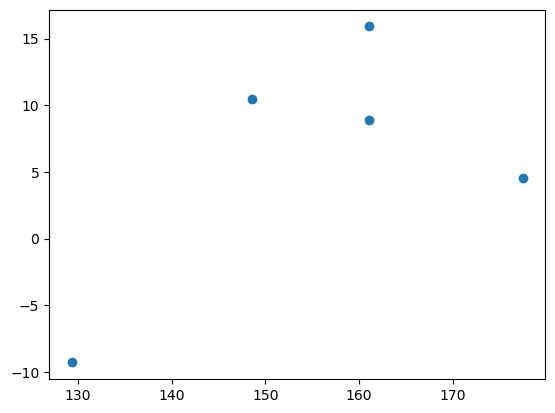

In [42]:
plt.scatter(y_pred_test,residuals)